<a href="https://colab.research.google.com/github/Yuyan-C/MAIS202Project/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## **Data Preprocessing**
Use first 371848 records for training, next 92962 records for validation, and last 116202 records for testing.

Normalize the data using min-max scalar.




In [ ]:
df = pd.read_csv('covtype.csv')
x = df['Horizontal_Distance_To_Hydrology'].values
y = df['Vertical_Distance_To_Hydrology'].values
distance = np.sqrt(np.square(x)+np.square(y))
df = df.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1)
df.insert(3, "Distance_To_Hydrology", distance)
df.head()

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258.000000,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212.084889,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,275.769832,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,269.235956,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153.003268,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
# set the number of training set, validation set, and testing set
# get the number of features 
num_features = len(df.columns)-1
# set X and y
scaler = MinMaxScaler() 
X = scaler.fit_transform(df.iloc[:, :num_features])
y = df.iloc[:, num_features:].to_numpy().reshape(len(df.index))

# Naive Random Sampling


In [ ]:
# set training, validation, and testing sets
# 64% training, 16% validation, 20% testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle = True)#
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Random Forest


14:25:08.772276
predicting training set...
14:30:34.399352
predicting validation set...
14:31:11.968185
predicting testing set...
14:31:15.821590
training accuracy: 0.9999992126697189
validation accuracy: 0.948527355263441
testing accuracy: 0.9491923616429868
training accuracy (balanced): 0.9999992126697189
validation accuracy (balanced): 0.9144780575065823
testing accuracy (balanced): 0.9093409409040784
14:31:21.836016
confusion matrix for training set:
 [[181445      0      0      0      0      0      0]
 [     0 181444      0      0      0      0      0]
 [     0      0 181445      0      0      0      0]
 [     0      0      0 181445      0      0      0]
 [     0      1      0      0 181445      0      0]
 [     0      0      0      0      0 181445      0]
 [     0      0      0      0      0      0 181445]]


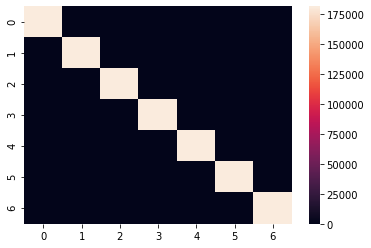

confusion matrix for validation set:
 [[31700  1349     2     0    20     0   130]
 [ 1943 43633    67     0   209    70    19]
 [    4   146  5548    42    23   226     0]
 [    0     0    21   402     0    12     0]
 [   11   120     7     0  1242     2     0]
 [    5    87   127    19     7  2458     0]
 [   96    21     0     0     0     0  3194]]


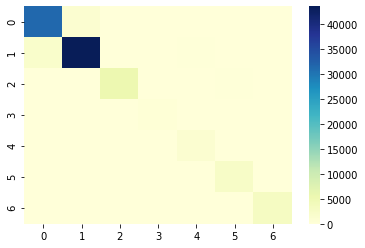

In [ ]:
clf = RandomForestClassifier()
print(datetime.now().strftime("%H:%M:%S.%f"))
clf.fit(X_train,y_train)
print("predicting training set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_train_pred = clf.predict(X_train)
print("predicting validation set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_valid_pred = clf.predict(X_valid)
print("predicting testing set...")
print(datetime.now().strftime("%H:%M:%S.%f"))
y_test_pred = clf.predict(X_test)
print("training accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("validation accuracy: {}".format(accuracy_score(y_valid,y_valid_pred)))
print("testing accuracy: {}".format(accuracy_score(y_test,y_test_pred)))
print("training accuracy (balanced): {}".format(balanced_accuracy_score(y_train, y_train_pred)))
print("validation accuracy (balanced): {}".format(balanced_accuracy_score(y_valid, y_valid_pred)))
print("testing accuracy (balanced): {}".format(balanced_accuracy_score(y_test, y_test_pred)))
print(datetime.now().strftime("%H:%M:%S.%f"))
#Confusion matrix whose i-th row and j-th column entry 
#indicates the number of samples with true label 
#being i-th class and predicted label being j-th class.
cf_matrix_train = confusion_matrix(y_train_pred, y_train)
print("confusion matrix for training set:\n {}".format(cf_matrix_train))
sns.heatmap(cf_matrix_train, annot=False)
plt.show()
cf_matrix_valid = confusion_matrix(y_valid_pred, y_valid)
print("confusion matrix for validation set:\n {}".format(cf_matrix_valid))
sns.heatmap(cf_matrix_valid, annot=False,cmap="YlGnBu")
plt.show()

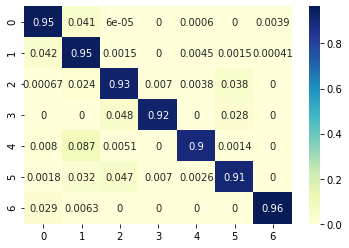

In [23]:
sum = np.sum(cf_matrix_valid,axis=1)
cf_matrix_valid = cf_matrix_valid / sum[:,None]
sns.heatmap(cf_matrix_valid, annot=True,cmap="YlGnBu")
plt.show()

confusion matrix for validation set:
 [[39985  1640     3     0    23     4   132]
 [ 2400 54386    71     0   292    77    25]
 [    2   172  6866    78    20   255     0]
 [    0     1    22   429     0    20     0]
 [   25   161     8     0  1649     6     1]
 [    7   118   151    19    11  3127     0]
 [  138    22     0     0     0     0  3857]]


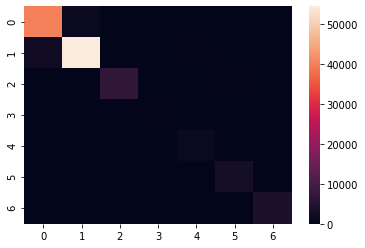

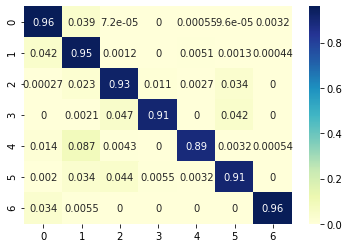

In [24]:
cf_matrix_test = confusion_matrix(y_test_pred, y_test)
print("confusion matrix for validation set:\n {}".format(cf_matrix_test))
sns.heatmap(cf_matrix_test, annot=False)
plt.show()
sum = np.sum(cf_matrix_test,axis=1)
cf_matrix_test = cf_matrix_test / sum[:,None]
sns.heatmap(cf_matrix_test, annot=True,cmap="YlGnBu")
plt.show()

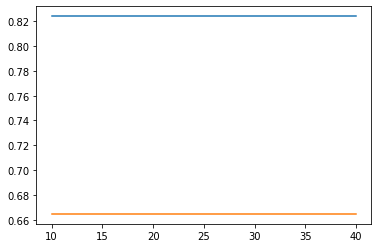

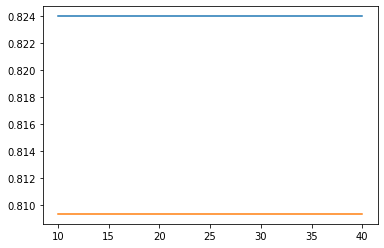

In [ ]:
max_depths = [10,20,30,40]
training_accuracy = []
validation_accuracy = []
training_accuracy_balanced, validation_accuracy_balanced = [], []
for i in max_depths:
  clf = RandomForestClassifier(max_depth= 10, random_state=42)
  clf.fit(X_train, y_train)
  clf.fit(X_train,y_train)
  y_train_pred = clf.predict(X_train)
  y_valid_pred = clf.predict(X_valid)
  training_accuracy.append(accuracy_score(y_train, y_train_pred))
  validation_accuracy.append(accuracy_score(y_valid,y_valid_pred))
  training_accuracy_balanced.append(balanced_accuracy_score(y_train, y_train_pred))
  validation_accuracy_balanced.append(balanced_accuracy_score(y_valid, y_valid_pred))

plt.plot(max_depths,training_accuracy)
plt.plot(max_depths, validation_accuracy)
plt.show()

plt.plot(max_depths,training_accuracy_balanced)
plt.plot(max_depths, validation_accuracy_balanced)
plt.show()

  